# Least squares -- polynomial fitting

AMath 584, Autumn 2016

In [1]:
%matplotlib inline

In [2]:
from pylab import *

## Define a function to use for generating sample data

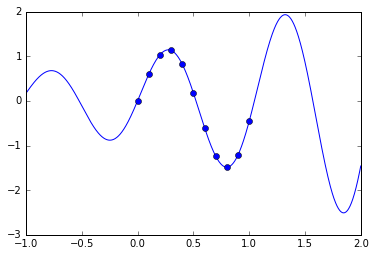

In [3]:
def f(t):
    return sin(6*t)*exp(0.5*t)

# Fine samples for plotting smooth function:
tfine = linspace(-1,2,1000)
yfine = f(tfine)
plot(tfine, yfine, 'b')

# Discrete data points for fitting:
t = linspace(0,1,11)
y = f(t)
plot(t,y,'bo')

### Least square fit by polynomial of degree n-1

First we set up the matrix $A$:

In [4]:
m = len(y)
n = 3
A = ones((m,n))
for j in range(1,n):
    A[:,j] = t**j
print A

[[ 1.    0.    0.  ]
 [ 1.    0.1   0.01]
 [ 1.    0.2   0.04]
 [ 1.    0.3   0.09]
 [ 1.    0.4   0.16]
 [ 1.    0.5   0.25]
 [ 1.    0.6   0.36]
 [ 1.    0.7   0.49]
 [ 1.    0.8   0.64]
 [ 1.    0.9   0.81]
 [ 1.    1.    1.  ]]


### Compute QR factorization using numpy function

This uses Householder reflectors to compute the factorization.

In [5]:
Q,R = qr(A)
print "Q = \n",Q
print "R = \n",R

Q = 
[[ -3.01511345e-01  -4.76731295e-01   5.12091556e-01]
 [ -3.01511345e-01  -3.81385036e-01   2.04836623e-01]
 [ -3.01511345e-01  -2.86038777e-01  -3.41394371e-02]
 [ -3.01511345e-01  -1.90692518e-01  -2.04836623e-01]
 [ -3.01511345e-01  -9.53462589e-02  -3.07254934e-01]
 [ -3.01511345e-01  -4.16333634e-17  -3.41394371e-01]
 [ -3.01511345e-01   9.53462589e-02  -3.07254934e-01]
 [ -3.01511345e-01   1.90692518e-01  -2.04836623e-01]
 [ -3.01511345e-01   2.86038777e-01  -3.41394371e-02]
 [ -3.01511345e-01   3.81385036e-01   2.04836623e-01]
 [ -3.01511345e-01   4.76731295e-01   5.12091556e-01]]
R = 
[[-3.31662479 -1.6583124  -1.16081868]
 [ 0.          1.04880885  1.04880885]
 [ 0.          0.          0.29291637]]


You can get info about this function via:

In [6]:
qr?

Solve the least squares problem $Ac = y$ by first setting $b = Q^Ty$ and then solving $Rc = b$:

In [7]:
b = dot(Q.T, y)
c = solve(R,b)
print c

[ 0.70993712 -0.55112488 -1.56095715]


The polynomial is $p(t) = c_0 + c_1t + c_2t^2 + \cdots + c_{n-1}t^{n-1}$.

Define a function that evaluates $p(t)$ (and also takes the coefficients `c` as input).

We do this using "Horner's method":
$$
p(t) = (\cdots((c_{n-1}t + c_{n-2})t + c_{n-2})t + \cdots + c_1)t + c_0
$$
This is just a rearrangement but takes fewer arithmetic operations and can be slightly more accurate.

In [8]:
def p(t,c):
    """
    Evaluate p(t), where p is the polynomial defined by coefficients c.
    """
    degree = len(c) - 1
    p = c[degree]
    for j in range(degree-1,-1,-1):
        p = p*t + c[j]
    return p

### Compare the fit (red) with the original function that provided the data (blue)

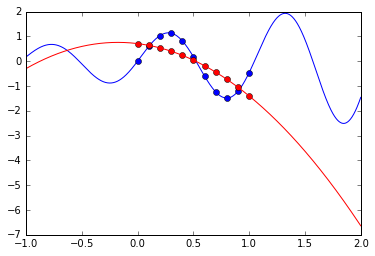

In [9]:
yfit = p(t,c)

plot(tfine, yfine, 'b')
plot(t,y,'bo')

plot(t, yfit, 'ro')
plot(tfine, p(tfine,c), 'r')

Obviously a parabola ($n=3$) doesn't fit the data very well. 

Try larger values of $n$ in the cells above.

## Illustration of instability of classical Gram-Schmidt

First set up and solve a bigger problem with the approach above.

Note that if $m=n$ then there should be an exact solution to $Ac=y$.

Residual y - Ac has norm 1.67505e-14


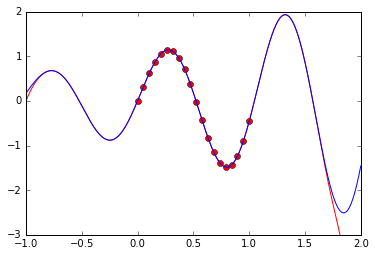

In [10]:
m = 20
t = linspace(0,1,m)
y = f(t)

n = 20
A = ones((m,n))
for j in range(1,n):
    A[:,j] = t**j
Q,R = qr(A)
b = dot(Q.T, y)
c = solve(R,b)

yfit = p(t,c)
plot(t, yfit, 'ro')
plot(tfine, p(tfine,c), 'r')
plot(tfine, yfine, 'b')

ylim(-3,2)

print "Residual y - Ac has norm %g" % norm(y - dot(A,c),2)

### Classical Gram-Schmidt

In [11]:
def clgs(A):
    """
    Classical Gram-Schmidt for real matrices A.
    """
    
    # Force A to have data of type float:
    # (in case user initializes with integers):
    A = array(A, dtype=float)  
    
    # Initialize Q, R of correct shapes, values filled in later:
    m,n = shape(A)
    Q = zeros((m,n))
    R = zeros((n,n))
    Vj = zeros(m)  # to hold v_j in each iteration
    
    for j in range(n):
        Vj[:] = A[:,j]   # initialize Vj to jth column of A
        for i in range(j):
            R[i,j]= inner(Q[:,i],A[:,j])
            Vj = Vj - R[i,j]*Q[:,i]
        R[j,j] = norm(Vj,2)
        Q[:,j] = Vj/R[j,j]
            
    return Q,R

Residual y - Ac has norm 1.67505e-14


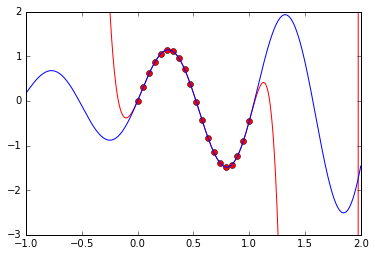

In [12]:
m = 20
t = linspace(0,1,m)
y = f(t)

n = 20
A = ones((m,n))
for j in range(1,n):
    A[:,j] = t**j
    
Q_gs,R_gs = clgs(A)
b = dot(Q_gs.T, y)
c_gs = solve(R_gs,b)

yfit = p(t,c_gs)
plot(t, yfit, 'ro')
plot(tfine, p(tfine,c_gs), 'r')
plot(tfine, yfine, 'b')

ylim(-3,2)

print "Residual y - Ac has norm %g" % norm(y - dot(A,c),2)

The residual is still small, but notice that the polynomial looks very different away from the interpolation points!

Plot the difference in coefficient vectors `c` obtained from `qr` and `c_gs` obtained by Gram-Schmidt:

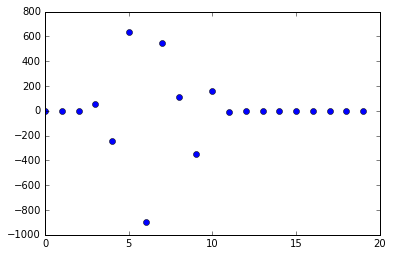

In [13]:
plot(c-c_gs,'o')

## Let's also look at the errors the factorization

Note that for the $QR$ factorization found with the `qr` method, $Q^TQ$ is nearly equal to the identity matrix and $QR$ is nearly equal to $A$:

In [14]:
print "Error in Q^T Q = ", abs(norm(dot(Q.T, Q) - eye(m))).max()
print "Error in QR = ", abs(norm(dot(Q,R) - A)).max()

Error in Q^T Q =  2.38384060829e-15
Error in QR =  1.83487986897e-15


For the Gram-Schmidt factorization, $QR=A$ still holds to within rounding error, but $A^TQ$ is far from the identity.  The vectors produced by the "orthogonalization" are not at all orthogonal!

In [15]:
print "Error in Q^T Q = ", abs(norm(dot(Q_gs.T, Q_gs) - eye(m))).max()
print "Error in QR = ", abs(norm(dot(Q_gs,R_gs) - A)).max()

Error in Q^T Q =  10.4687452148
Error in QR =  9.1726064765e-16


## Condition number of A

The condition number of $A$ reveals that $A$ is nearly singular, i.e. the columns of $A$ are close to being linearly dependent (as discussed in class for this problem):

In [16]:
print "The 2-norm condition number of A is %6.3e" % cond(A)

The 2-norm condition number of A is 1.125e+16


In general using the "monomial basis" to represent a general polynomial is a bad idea, since these are nearly linearly dependent (plot them on the interval $[0,1]$).  

It would be much better to represent the polynomial as a linear combination of some other basis polynomials, in particular "orthogonal polynomials".